In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list_of_orders = pd.read_csv('List_of_Orders_55FFC79CF8.csv')
list_of_orders = list_of_orders.dropna()
list_of_orders['Order Date'] = pd.to_datetime(list_of_orders['Order Date'], format='%d-%m-%Y')

list_of_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


In [3]:
print("Shape:", list_of_orders.shape)
print("Null Values:\n", list_of_orders.isna().sum())

Shape: (500, 5)
Null Values:
 Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


In [4]:
order_details = pd.read_csv('Order_Details_19795F61CF.csv')
order_detials = order_details.dropna()
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [5]:
print("Shape:", order_details.shape)
print("Null Values:\n", order_details.isna().sum())

Shape: (1500, 6)
Null Values:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64


In [6]:
sales_target = pd.read_csv('Sales_target_DD2E9B96A0.csv')
sales_target = sales_target.dropna()
sales_target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [7]:
print("Shape:", sales_target.shape)
print("Null Values:\n", sales_target.isna().sum())

Shape: (36, 3)
Null Values:
 Month of Order Date    0
Category               0
Target                 0
dtype: int64


## **Part 1: Sales and Profitability Analysis**




#### Part 1 (A)


In [8]:
merged_data = pd.merge(list_of_orders, order_details, on='Order ID')
merged_data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [9]:
total_sales_by_category = merged_data.groupby('Category')['Amount'].sum()
total_sales_by_category

,Amount
Category,
Clothing,139054.0
Electronics,165267.0
Furniture,127181.0


#### Part 1 (B)

In [10]:
average_profit_per_order = merged_data.groupby('Category')['Profit'].mean()
average_profit_per_order

,Profit
Category,
Clothing,11.762908
Electronics,34.071429
Furniture,9.456790


In [11]:
merged_data['Profit Margin'] = (merged_data['Profit'] / merged_data['Amount']) * 100
total_profit_margin = merged_data.groupby('Category')['Profit Margin'].mean()
total_profit_margin

,Profit Margin
Category,
Clothing,4.132921
Electronics,-0.622928
Furniture,-6.788811


In [12]:
final_result = pd.merge(average_profit_per_order, total_profit_margin, on='Category')
final_result

,Profit,Profit Margin
Category,,
Clothing,11.762908,4.132921
Electronics,34.071429,-0.622928
Furniture,9.456790,-6.788811


#### Part 1 (C)

**Top-Performing Category:**

The best performing category is clothing which has strong sales revenue and a good profit margin (4.13%).

Performance Reason: Clothing could be performing well due to better cost management, pricing strategy, or stronger demand.

**Under-Performing Category**

Electronics and Furniture are both underperforming due to their negative profit margins.

Electronics: Despite the high sales, the category has a negative profit margin.

Furniture: This category has the lowest profit margin of all.

## **Part 2: Target Achievement Analysis**

#### Part 2 (A)

In [13]:
sales_target['Month of Order Date'] = pd.to_datetime(sales_target['Month of Order Date'], format='%b-%y')
furniture_sales_target = sales_target[sales_target['Category'] == 'Furniture']
furniture_sales_target = furniture_sales_target.sort_values(by='Month of Order Date')
furniture_sales_target['MoM Change'] = furniture_sales_target['Target'].pct_change() * 100

furniture_sales_target

,Month of Order Date,Category,Target,MoM Change
0,2018-04-01,Furniture,10400.0,NaN
1,2018-05-01,Furniture,10500.0,0.961538
2,2018-06-01,Furniture,10600.0,0.952381
3,2018-07-01,Furniture,10800.0,1.886792
4,2018-08-01,Furniture,10900.0,0.925926
5,2018-09-01,Furniture,11000.0,0.917431
6,2018-10-01,Furniture,11100.0,0.909091
7,2018-11-01,Furniture,11300.0,1.801802
8,2018-12-01,Furniture,11400.0,0.884956
9,2019-01-01,Furniture,11500.0,0.877193


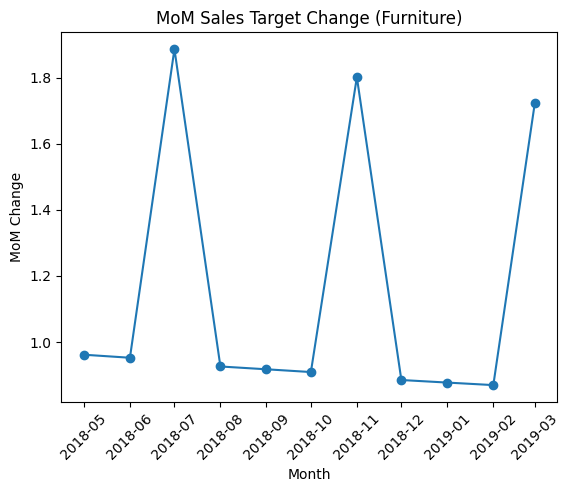

In [14]:
plt.plot(furniture_sales_target['Month of Order Date'], furniture_sales_target['MoM Change'], marker='o')
plt.xlabel('Month')
plt.ylabel('MoM Change')
plt.title('MoM Sales Target Change (Furniture)')
plt.xticks(rotation=45)
plt.show()

#### Part 2 (B)

* The MoM change is mostly constant, fluctuating between 0.87% and 1.88%.
* July 2018 (1.88%), November 2018 (1.80%) and March 2019 (1.72%) saw the highest target growth rates.


* The increase in target in July can be due to the pre monsoon season or start of academic season (funitures by educational institutions).
* Rise in November can be because of the festive season in that particular month.
* In March, it might be possible due to any sale or offer provided by the furniture company. But we can look into the past years data too, to get an ideal insight for this.

Stratergies:

* Offer special discounts during high-growth period.
* Increase targets and inventory 2-3 months before high demand periods.
* Use historical data from past data to find monthly targets.
* Ensure fast shipping and easy returns to prevent stockouts.

## **Part 3: Regional Performance Insights**

#### Part 3 (A)

In [36]:
top_states = merged_data.groupby("State")["Order ID"].nunique().index.tolist()
top_states

['Andhra Pradesh',
 'Bihar',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Karnataka',
 'Kerala ',
 'Madhya Pradesh',
 'Maharashtra',
 'Nagaland',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Uttar Pradesh',
 'West Bengal']

In [37]:
filtered_df = merged_data[merged_data["State"].isin(top_states)]
filtered_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,Profit Margin
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,-90.039216
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,-18.181818
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,-25.000000
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,-70.000000
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,-66.071429


In [38]:
result = filtered_df.groupby("State").agg(
    Total_Orders=("Order ID", "nunique"),
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean")
)

result = result.sort_values(by="Total_Orders", ascending=False)
result

,Total_Orders,Total_Sales,Avg_Profit
State,,,
Madhya Pradesh,101,105140.0,16.326471
Maharashtra,90,95348.0,21.296552
Rajasthan,32,21149.0,16.986486
Gujarat,27,21058.0,5.344828
Punjab,25,16786.0,-10.150000
West Bengal,22,14086.0,39.682540
Delhi,22,22531.0,40.364865
Uttar Pradesh,22,22359.0,47.602941
Karnataka,21,15058.0,11.944444


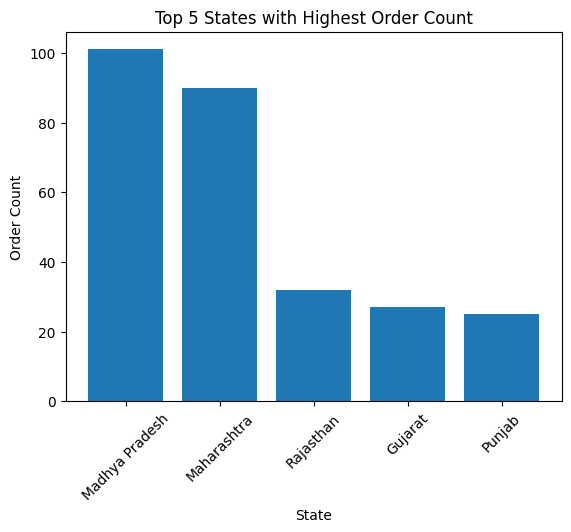

In [44]:
plot_result = result.head()
plt.bar(plot_result.index, plot_result['Total_Orders'])
plt.xlabel('State')
plt.ylabel('Order Count')
plt.title('Top 5 States with Highest Order Count')
plt.xticks(rotation=45)
plt.show()

#### Observations:

* Madhya Pradesh has the highest order count (101) and strong average profit (₹16.32 per order).
* Maharashtra follows with 90 orders and the highest average profit (₹21.29 per order).
* Rajasthan has 32 orders but maintains good average profit (₹16.98 per order).
* Gujarat shows low average profit (₹5.34 per order) despite sales being close to Rajasthan.
* Punjab has the lowest total sales (₹16,786) and negative profit.

#### Conclusion:

* Since, Maharashtra and MP have high demand, we can increase the availability of the products.
* In Rajasthan, we can improve the cusotmer base and spread more information about the products.
* Gujarat numbers are similar to Rajasthan but the average profit is less in Gujarat so we can make changes in cost/prices.
* Punjab need immediate actions. We can experiment with different mix of products or have a through research about the other vendors there.

#### Regions to be prioritized:

* Tamil Nadu, Andhra Pradesh, and Punjab require immediate strategies to reduce losses. Most states have less order count and negative profit.
* Goa, Nagaland, and Sikkim can be improved through better outreach, promotion, offers.